# Plotting

First, let's train up a simple network to explore. This one is trained to compute XOR:

In [2]:
from conx import Network, Layer, SGD

#net = Network("XOR Network", 2, 4, 1, activation="sigmoid")

net = Network("XOR Network")
net.add(Layer("input", shape=2))
net.add(Layer("hidden", shape=4, activation='sigmoid'))
net.add(Layer("output", shape=1, activation='sigmoid'))
net.connect()

dataset = [
    ([0, 0], [0]),
    ([0, 1], [1]),
    ([1, 0], [1]),
    ([1, 1], [0])
]
net.compile(loss='mean_squared_error', optimizer=SGD(lr=0.3, momentum=0.9))
net.dataset.load(dataset)

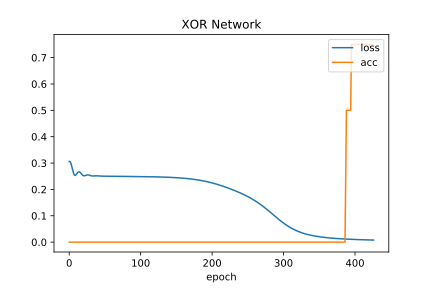

#  428 |   0.00762 |   1.00000 


In [3]:
net.train(epochs=2000, accuracy=1, report_rate=25, plot=True)

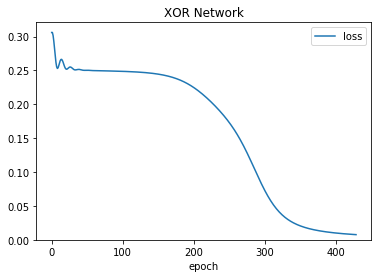

In [4]:
net.plot('loss', ymin=0)

## Propagate to plot

This plotting function allows us to see the activation at a specific unit, given that we vary two inputs.

You must specify which output or hidden layer unit to plot, the name of the input bank, and the two units.

In this example, we explore the output unit given that we vary the two inputs:

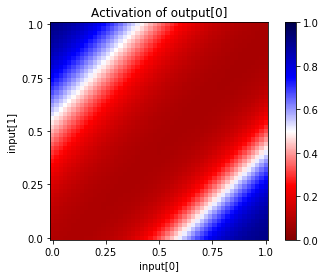

In [5]:
net.propagate_to_plot(output_layer="output", output_index=0, 
                      input_layer="input", input_index1=0, input_index2=1,
                      act_range=(0,1))

We can verify the above output activation map by running different input vectors through the network manually:

In [6]:
input=[0,1]; print(net.propagate_to('output', input)[0])

0.9168887734413147


How does the network actually solve the problem? We can look at the intermediary values at the hidden layer by plotting each of the 4 hidden units in this manner:

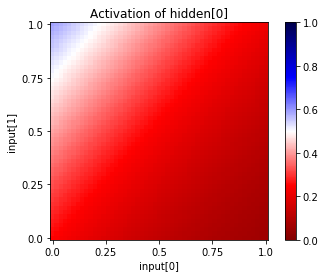

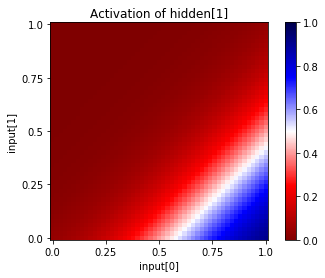

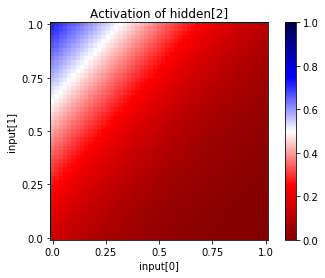

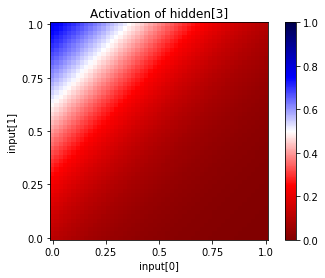

In [7]:
for i in range(4):
    net.propagate_to_plot(output_layer="hidden", output_index=i, 
                          input_layer="input", input_index1=0, input_index2=1,
                          act_range=(0,1))

## Plotting training error (loss) and training accuracy (acc)

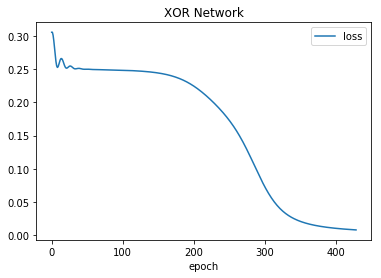

In [8]:
net.plot("loss")

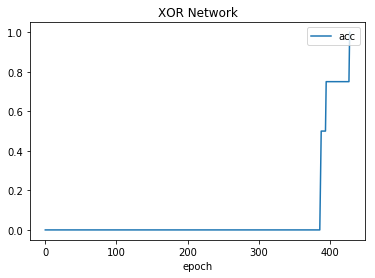

In [9]:
net.plot("acc")

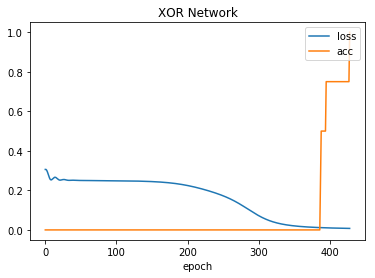

In [10]:
net.plot(["loss", "acc"])

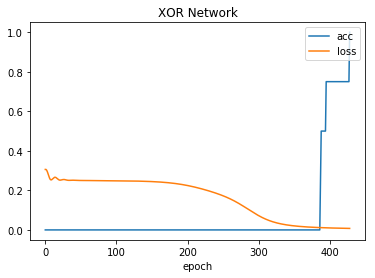

In [11]:
net.plot("all")